# Several sorter comparison on several datatset with ground truth

This simple notebook illustrate how to run several sorters on several dataset with ground truth.

This will be done with mainly with 2 functions:
  * **spiketoolkit.sorters.run_sorters** : this run several sorters on serevals dataset
  * **spiketoolkit.comparison.gather_sorting_comparison** : this run several all possible comparison
    with ground truth and results some metrics (accuracy, true positive rate, ..)



In [1]:
import spiketoolkit as st
import spikeextractors as se

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import time

%matplotlib notebook

15:56:09 [I] klustakwik KlustaKwik2 version 0.2.6


## Step 1 : generate several dataset with "toy_example"

This generate 2 toys dataset with there relative ground trith sorting.


In [2]:
rec0, gt_sorting0 = se.example_datasets.toy_example(num_channels=4, duration=30)
rec1, gt_sorting1 = se.example_datasets.toy_example(num_channels=32, duration=30)

## Step 2 : run all sorter on all dataset

This run all sorter on all recording and store the results in a working folder.

In [4]:
# this cell is really verbose due to some sorter so switch off output console

recording_dict = {'toy_tetrode' : rec0, 'toy_probe32': rec1}
sorter_list = ['tridesclous', 'herdingspikes',]
path = 'comparison_example/'
working_folder = path + '/working_folder'

t0 = time.perf_counter()
st.sorters.run_sorters(sorter_list, recording_dict, working_folder, engine=None)
t1 = time.perf_counter()
print('total run time', t1-t0)

('toy_tetrode', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f67ba9cb198>, 'tridesclous', PosixPath('comparison_example/working_folder/output_folders/toy_tetrode/tridesclous'), None, False, True)
'group' property is not available and it will not be saved.
('toy_tetrode', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f67ba9cb198>, 'herdingspikes', PosixPath('comparison_example/working_folder/output_folders/toy_tetrode/herdingspikes'), None, False, True)
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 30000
# Localization On
# Number of recorded channels: 4
# Analysing frames: 900000; Seconds: 30.0
# Frames before spike in cutout: 30
# Frames after spike in cutout: 66
# tcuts: 81 117
# tInc: 50000
# Analysing frames from -81 to 50117  (0.0%)
# Analysing frames from 49919 to 100117  (5.6%)
# Analysing frames from 99919 to 150117  (1

/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/herdingspikes-0.3.0-py3.6-linux-x86_64.egg/herdingspikes/clustering/mean_shift_.py:211: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  ncpus = effective_n_jobs(n_jobs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/herdingspikes-0.3.0-py3.6-linux-x86_64.egg/herdingspikes/clustering/mean_shift_.py:211: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  ncpus = effective_n_jobs(n_jobs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Number of estimated units: 4
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 396 spikes...
number of seeds: 396
seeds/job: 397
using 1 cpus


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Number of estimated units: 4
# Warning: no sampling rate given, will be set to 0 in the hdf5 file.
('toy_probe32', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f67ba9e4b70>, 'tridesclous', PosixPath('comparison_example/working_folder/output_folders/toy_probe32/tridesclous'), None, False, True)
'group' property is not available and it will not be saved.
('toy_probe32', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f67ba9e4b70>, 'herdingspikes', PosixPath('comparison_example/working_folder/output_folders/toy_probe32/herdingspikes'), None, False, True)
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 30000
# Localization On
# Number of recorded channels: 32
# Analysing frames: 900000; Seconds: 30.0
# Frames before spike in cutout: 30
# Frames after spike in cutout: 66
# tcuts: 81 117
# tInc: 50000
# Analysing frames from -81 to 50117

/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/herdingspikes-0.3.0-py3.6-linux-x86_64.egg/herdingspikes/clustering/mean_shift_.py:211: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  ncpus = effective_n_jobs(n_jobs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/home/samuel/.virtualenvs/py36/lib/python3.6/site-packages/herdingspikes-0.3.0-py3.6-linux-x86_64.egg/herdingspikes/clustering/mean_shift_.py:211: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  ncpus = effective_n_jobs(n_jobs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Number of estimated units: 11
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 527 spikes...
number of seeds: 527
seeds/job: 528
using 1 cpus
Number of estimated units: 11
# Warning: no sampling rate given, will be set to 0 in the hdf5 file.
total run time 20.90394236600332


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


## Step3 : collect Datatframe of comparison

This collect all results for all **(rec_name, sorter_name)** pair and apply the SortingComparison class for each.

This also concatenate performances in several dataframes.



In [5]:
ground_truths = {'toy_tetrode': gt_sorting0, 'toy_probe32': gt_sorting1}

comparisons, dataframes = st.comparison.gather_sorting_comparison(working_folder, ground_truths,use_multi_index=True)

## Step 4 : display tables

**dataframes** is a dict that contain several results formated in dataframes:
  * run_times : time for computing each one
  * perf_pooled_with_sum: performance with method **pooled_with_sum**
  * perf_pooled_with_average: performance with method **pooled_with_average**

In [6]:
dataframes['perf_pooled_with_sum']

tp_rate  fn_rate   cl_rate fp_rate_st1 fp_rate_st2  \
rec_name    sorter_name                                                         
toy_tetrode tridesclous    78.8184  21.1816         0     16.2824     17.1212   
            herdingspikes  17.8674  81.9885  0.144092      39.049     68.4343   
toy_probe32 tridesclous    99.5671   0.4329         0      0.2886    0.289017   
            herdingspikes  57.1429  42.5685    0.2886     18.9033     24.8577   

                          accuracy sensitivity precision miss_rate  \
rec_name    sorter_name                                              
toy_tetrode tridesclous    67.7819     78.8184   82.8788   21.1816   
            herdingspikes  12.8631     17.8932   31.3924   82.1068   
toy_probe32 tridesclous    99.2806     99.5671    99.711    0.4329   
            herdingspikes  48.1752     57.3082   75.1423   42.6918   

                          false_disc_rate  
rec_name    sorter_name                    
toy_tetrode tridesclous           17.1212  
            herdingspikes         68.6076  
toy_probe32 tridesclous          0.289017  
            herdingspikes         24.8577

In [7]:
dataframes['perf_pooled_with_average']

tp_rate   fn_rate  cl_rate fp_rate_st1 fp_rate_st2  \
rec_name    sorter_name                                                         
toy_tetrode tridesclous    79.4134   20.5866  79.4134     12.8003     9.07924   
            herdingspikes  18.3077   81.5385  18.3077     2.15385     10.2941   
toy_probe32 tridesclous    99.5729  0.427085  99.5729           0           0   
            herdingspikes  57.0788    42.635  57.0788     8.69565     7.75194   

                          accuracy sensitivity precision miss_rate  \
rec_name    sorter_name                                              
toy_tetrode tridesclous    72.2095     79.4134   90.9208   20.5866   
            herdingspikes  16.9231     18.4375   89.7059   81.5625   
toy_probe32 tridesclous    99.5729     99.5729       100  0.427085   
            herdingspikes  52.6846     57.3358   92.2481   42.6642   

                          false_disc_rate  
rec_name    sorter_name                    
toy_tetrode tridesclous               NaN  
            herdingspikes             NaN  
toy_probe32 tridesclous               NaN  
            herdingspikes             NaN

In [8]:
dataframes['run_times']

run_time
rec_name    sorter_name             
toy_tetrode tridesclous     2.681945
            herdingspikes   2.786038
toy_probe32 tridesclous    11.876675
            herdingspikes   2.522089

## Step 5: inspect result by spiketrain

For finer exploration, we can also compute for all **(rec_name, sorter_name)** pair the performance with method=**by_spiketrain**.

This give a give result for each units of the ground truth.


In [9]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='by_spiketrain')
    display(perf)

toy_tetrode tridesclous


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,100,0,100,98.5915,49.6454,50.3546,100,50.3546,0,NaN,49.6454
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
4,100,0,100,0,0,100,100,100,0,NaN,0
5,98.5294,1.47059,98.5294,29.4118,22.9885,76.1364,98.5294,77.0115,1.47059,NaN,22.9885
6,100,0,100,0,0,100,100,100,0,NaN,0
7,100,0,100,0,0,100,100,100,0,NaN,0
8,98.4615,1.53846,98.4615,0,0,98.4615,98.4615,100,1.53846,NaN,0
9,98.5714,1.42857,98.5714,0,0,98.5714,98.5714,100,1.42857,NaN,0
10,98.5714,1.42857,98.5714,0,0,98.5714,98.5714,100,1.42857,NaN,0


toy_tetrode herdingspikes


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
4,83.0769,15.3846,83.0769,21.5385,20.5882,69.2308,84.375,79.4118,15.625,NaN,20.5882
5,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
6,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
7,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
8,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,100,0,100,0,0,100,100,100,0,NaN,0


toy_probe32 tridesclous


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,98.6301,1.36986,98.6301,0,0,98.6301,98.6301,100,1.36986,NaN,0
2,100,0,100,0,0,100,100,100,0,NaN,0
3,100,0,100,0,0,100,100,100,0,NaN,0
4,98.5075,1.49254,98.5075,0,0,98.5075,98.5075,100,1.49254,NaN,0
5,100,0,100,0,0,100,100,100,0,NaN,0
6,100,0,100,0,0,100,100,100,0,NaN,0
7,100,0,100,0,0,100,100,100,0,NaN,0
8,100,0,100,0,0,100,100,100,0,NaN,0
9,100,0,100,0,0,100,100,100,0,NaN,0
10,98.5915,1.40845,98.5915,0,0,98.5915,98.5915,100,1.40845,NaN,0


toy_probe32 herdingspikes


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,97.2603,2.73973,97.2603,0,0,97.2603,97.2603,100,2.73973,NaN,0
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
4,95.5224,2.98507,95.5224,0,0,96.9697,96.9697,100,3.0303,NaN,0
5,100,0,100,0,0,100,100,100,0,NaN,0
6,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
7,80.8219,17.8082,80.8219,0,0,81.9444,81.9444,100,18.0556,NaN,0
8,100,0,100,86.9565,46.5116,53.4884,100,53.4884,0,NaN,46.5116
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,97.1831,2.8169,97.1831,0,0,97.1831,97.1831,100,2.8169,NaN,0


## Step 6 : easy plot with seaborn

With the seaborn package, it is very easy to summary with plot dataframes.

Here some basic example for performances and run times.

<IPython.core.display.Javascript object>


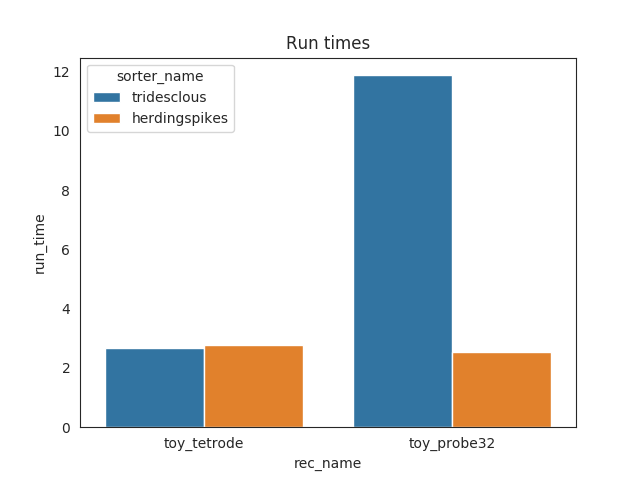

Text(0.5, 1.0, 'Run times')

In [10]:
run_times = dataframes['run_times'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=run_times, x='rec_name', y='run_time', hue='sorter_name', ax=ax)
ax.set_title('Run times')

<IPython.core.display.Javascript object>


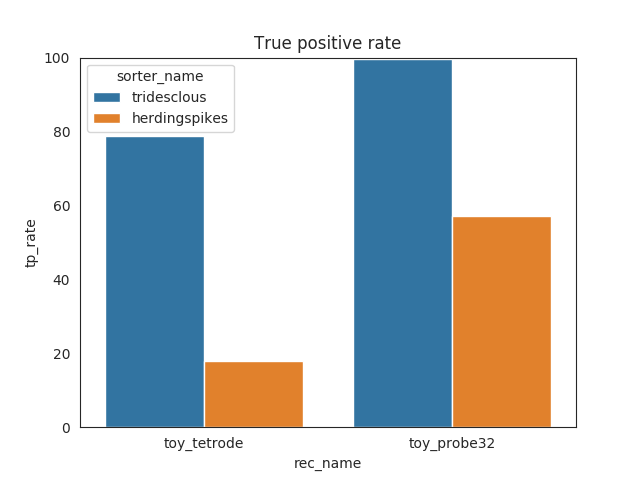

(0, 100)

In [12]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='tp_rate', hue='sorter_name', ax=ax)
ax.set_title('True positive rate')
ax.set_ylim(0, 100)

<IPython.core.display.Javascript object>


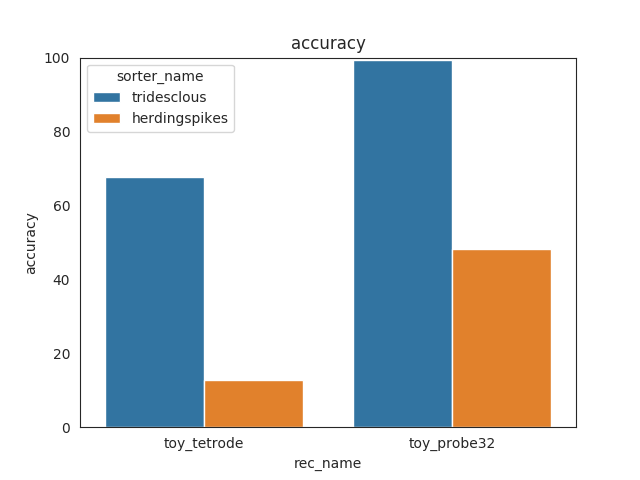

(0, 100)

In [13]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='accuracy', hue='sorter_name', ax=ax)
ax.set_title('accuracy')
ax.set_ylim(0, 100)

## Et voilà!!